# Detect Covid-19 with Chest X-Ray using PyTorch
Welcome to detecting Covid-19 with Chest X-ray using PyTorch!   
Student: Holger Espinola  
Instructor: Amit Yadav

### About this course
------------------
In 2 hour long guided project, we will use a ResNet-18 model and train it on a 
Covid-19 Radiography dataset. This dataset has nearly 3000 Chest X-ray scans 
wich are categorized in 3 classes:   
  - Normal  
  - Viral pneumonia   
  - Covid-19   

Our objective in this project is to create an image classification model that 
can predict Chest X-ray scans that belong to one of 3 classes with a reasonably 
high accuracy. 
Please note that this dataset, and the model that we train in the project, 
can not be used to diagnose Covid-19 or viral pneumonia. We are only using this 
data for educational purpose. 

Before you attempt this project, you should be familiar with: 
  - Programming python
  - Theoretical understanding of CNN
  - Understanding optimization techniques such as gradient descent

* This is a hands on, practical project that focuses primarily on implementation, and not on the theory of CNN. 

Before diving into the project, please take a look at the course objectives and structure: 

### Course Objectives
----------------------------------
In this course, we are going to focus on the following learning objectives: 
  1. Create custom dataset and dataloader in PyTorch
  2. Train a ResNet-18 model in PyTorch to perform Image Classification

By the end of this course, you will be able to create a CNN, and will be able to train it to classify Chest X-Ray scans with reasonably high accuracy. 

### Course Structure
-----------------------------------
This course is divided into 3 parts: 
  1. Course overview: This introductory reading material
  2. Detecting Covid-19 with Chest X-Ray using PyTorch: This is the hands on project that we will work on in Rhyme. 
  3. Graded Quiz: This is the final assignment that you need to pass in order to finish the course successfully. 

### Project Structure
-----------------------------------
The hands on project on detecting Covid-19 with Chest X-Ray using PyTorch is divided into following tasks: 
  1. Task 1: Introduction
  2. Task 2: Importing libraries
  3. Task 3: Creating custom dataset
  4. Task 4: Image transformations
  5. Task 5: Prepare DataLoader
  6. Task 6: Data Visualization
  7. Task 7: Creating the model
  8. Task 8: Training the model
  9. Task 9: Final results

### Meet the instructor
----------------------------------
Amit Yadav is a Machine Learning Engineer with focus in creating Deep Learning based Computer Vision and Signal Processing products. He has led chat bot development at a large corporation in the past. Amit is one of the Machine Learning and Data Science instructors at Rhyme. 

### Earn a Certificate
---------------------------------
After you have completed the detecting Covid-19 with Chest X-Ray using PyTorch hands-on project, you will be able to assess your knowledge using an ungraded assignment.  
Once you are comfortable with the concepts, take the final quiz, score higher than 80% to earn your certificate. 


### Learner Notebook
--------------------------

### Task 1. Introduction

In [1]:
#add files of google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Task 2. Importing Libraries

In [2]:
#import libraries
%matplotlib inline 
import os
import shutil
import random
import torch
import torchvision
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#make seed to random
torch.manual_seed(0)

#print version of pytorch
print('Using PyTorch version ', torch.__version__)


Using PyTorch version  1.7.0+cu101


Preparing training and test sets

In [3]:
!ls '/content/drive/My Drive/Pytorch Scholarship Challenge/Detect Covid with x-ray/COVID-19 Radiography Database'

 COVID-19		  NORMAL.metadata.xlsx	'Viral Pneumonia.matadata.xlsx'
 COVID-19.metadata.xlsx   README.md.txt
 NORMAL			 'Viral Pneumonia'


In [4]:
#define classes
class_names = ['normal', 'viral', 'covid']
root_dir = '/content/drive/My Drive/Pytorch Scholarship Challenge/Detect Covid with x-ray/COVID-19 Radiography Database'
source_dirs = ['NORMAL', 'Viral Pneumonia', 'COVID-19']

if os.path.isdir(os.path.join(root_dir, source_dirs[1])):
  os.mkdir(os.path.join(root_dir, 'test')) 

  #define names of images of training set
  for i, d in enumerate(source_dirs):
    os.rename(os.path.join(root_dir, d), os.path.join(root_dir, class_names[i]))
  
  for c in class_names: 
    os.mkdir(os.path.join(root_dir, 'test', c))

  #define 30 samples of images of test set
  for c in class_names:
    images = [x for x in os.listdir(os.path.join(root_dir, c)) if x.lower().endswith('png')]
    selected_images = random.sample(images, 30)

    for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'test', c, image)
      shutil.move(source_path, target_path)


In [8]:
!ls '/content/drive/My Drive/Pytorch Scholarship Challenge/Detect Covid with x-ray/COVID-19 Radiography Database'

 covid			  NORMAL.metadata.xlsx	 viral
 COVID-19.metadata.xlsx   README.md.txt		'Viral Pneumonia.matadata.xlsx'
 normal			  test


#### Task 3. Creating custom dataset

In [9]:
class ChestXRayDataset(torch.utils.data.Dataset):
  def __init__(self, image_dirs, transform):
    def get_images(class_name):
      images = [x for x in os.listdir(image_dirs[class_name]) if x.lower().endswith('png')]
      print(f'Found {len(images)} {class_name} examples')
      return images
    
    self.images = {}
    self.class_names = ['normal', 'viral', 'covid']

    for c in self.class_names:
      self.images[c] = get_images(c)
    
    self.image_dirs = image_dirs
    self.transform = transform

  def __len__(self):
    return sum([len(self.images[c]) for c in self.class_names])

  def __getitem__(self, index):
    class_name = random.choice(self.class_names)
    index = index % len(self.images[class_name])
    image_name = self.images[class_name][index]
    image_path = os.path.join(self.image_dirs[class_name], image_name)
    image = Image.open(image_path).convert('RGB')
    return self.transform(image), self.class_names.index(class_name)


### Task 4. Image transformation


In [10]:
#transformation to train set
train_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size = (224, 224)), 
    torchvision.transforms.RandomHorizontalFlip(), 
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
])

#transformation to test set
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size = (224, 224)), 
    torchvision.transforms.ToTensor(), 
    torchvision.transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
])

### Task 5. Prepare DataLoader

In [13]:
path_dir = '/content/drive/My Drive/Pytorch Scholarship Challenge/Detect Covid with x-ray/'

In [14]:
train_dirs = {
    'normal' : path_dir + 'COVID-19 Radiography Database/normal', 
    'viral' : path_dir + 'COVID-19 Radiography Database/viral', 
    'covid' : path_dir + 'COVID-19 Radiography Database/covid'
}

train_dataset = ChestXRayDataset(train_dirs, train_transform)

Found 1311 normal examples
Found 1315 viral examples
Found 189 covid examples


In [16]:
test_dirs = {
    'normal' : path_dir + 'COVID-19 Radiography Database/test/normal', 
    'viral' : path_dir + 'COVID-19 Radiography Database/test/viral', 
    'covid' : path_dir + 'COVID-19 Radiography Database/test/covid'
}

test_dataset = ChestXRayDataset(test_dirs, test_transform)

Found 30 normal examples
Found 30 viral examples
Found 30 covid examples


In [17]:
#results of data loader
batch_size = 6

#dataloader of train
dl_train = torch.utils.data.DataLoader(train_dataset, 
                                       batch_size = batch_size, 
                                       shuffle = True)
#dataloader of test
dl_test = torch.utils.data.DataLoader(test_dataset, 
                                      batch_size = batch_size, 
                                      shuffle = True)
#print results
print(f'Num of training batches: {len(dl_train)}')
print(f'Num of testing batches: {len(dl_test)}')


Num of training batches: 470
Num of testing batches: 15


### Task 6. Data Visualization

In [18]:
class_names = train_dataset.class_names

def show_images(images, labels, preds):
  plt.figure(figsize = (8, 4))

  for i, image in enumerate(images):
    plt.subplot(1, 6, i+1, xticks = [], yticks = [])
    image = image.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0., 1.)
    plt.imshow(image)
    
    col = 'green' if preds[i] == labels[i] else 'red'
    plt.xlabel(f'{class_names[int(labels[i].numpy())]}')
    plt.ylabel(f'{class_names[int(preds[i].numpy())]}', color = col)

  plt.tight_layout()
  plt.show()


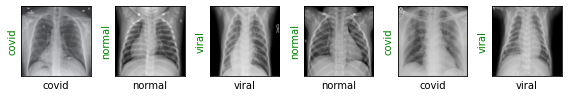

torch.Size([6, 3, 224, 224])


In [20]:
#show images of training
images, labels = next(iter(dl_train))
show_images(images, labels, labels)
print(images.shape)

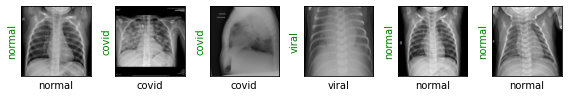

torch.Size([6, 3, 224, 224])


In [21]:
#show images of testing
images, labels = next(iter(dl_test))
show_images(images, labels, labels)
print(images.shape)

### Task 7. Creating the Model

In [22]:
#load pre-trained resnet-18 model
resnet18 = torchvision.models.resnet18(pretrained = True)
print(resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [23]:
#editing fully-connected layer
resnet18.fc = torch.nn.Linear(in_features = 512, out_features = 3)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr = 3e-5)

In [28]:
#print editted model
print(resnet18)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
#define function to show predictions

def show_preds():
  resnet18.eval()
  images, labels = next(iter(dl_test))
  outputs = resnet18(images)
  _, preds = torch.max(outputs, 1)
  show_images(images, labels, preds)


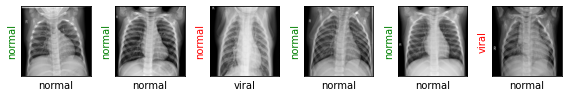

In [29]:
show_preds()

### Task 8. Training the model

In [32]:
def training(epochs):
  print('Starting training....')

  for e in range(0, epochs):
    print('=' * 20)
    print(f'Starting epoch {e+1}/{epochs}')
    print('=' * 20)

    train_loss = 0.
    resnet18.train()

    for train_step, (images, labels) in enumerate(dl_train):
      optimizer.zero_grad()
      outputs = resnet18(images)
      loss = loss_fn(outputs, labels)
      loss.backward()
      optimizer.step()
      train_loss += loss.item()

      if train_step % 20 == 0:
        print('Evaluating step...', train_step)
        val_loss = 0.
        accuracy = 0.
        resnet18.eval()

        for val_step, (images, labels) in enumerate(dl_test):
          outputs = resnet18(images)
          loss = loss_fn(outputs, labels)
          val_loss += loss.item()
          _, preds = torch.max(outputs, 1)
          accuracy += sum((preds == labels).numpy())
        val_loss /= (val_step+1)
        accuracy = accuracy/len(test_dataset)
        print(f'Val loss: {val_loss:.4f}  ===> Accuracy: {accuracy:.3f}') 
        show_preds()

        resnet18.train()

        if accuracy > 0.95:
          print('Performance condition satisfied...')
          return
    
    train_loss /= (train_step + 1)
    print(f'Training loss: {train_loss:.4f}')


Starting training....
Starting epoch 1/1
Evaluating step... 0
Val loss: 0.8886  ===> Accuracy: 0.544


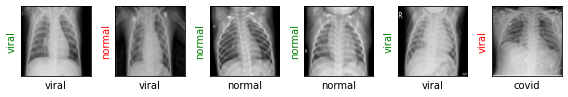

Evaluating step... 20
Val loss: 0.5324  ===> Accuracy: 0.911


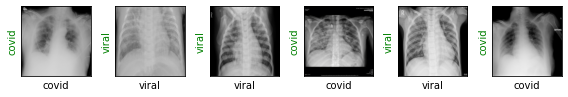

Evaluating step... 40
Val loss: 0.2791  ===> Accuracy: 0.944


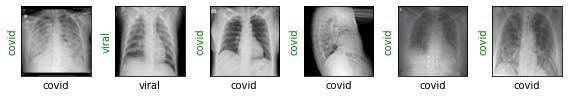

Evaluating step... 60
Val loss: 0.2734  ===> Accuracy: 0.911


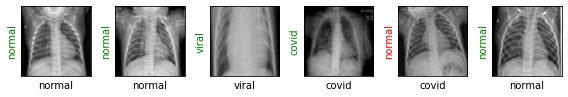

Evaluating step... 80
Val loss: 0.2073  ===> Accuracy: 0.922


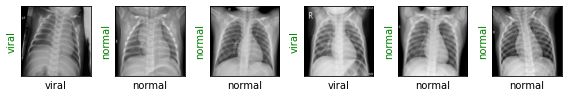

Evaluating step... 100
Val loss: 0.1806  ===> Accuracy: 0.933


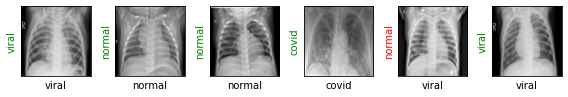

Evaluating step... 120
Val loss: 0.1092  ===> Accuracy: 0.978


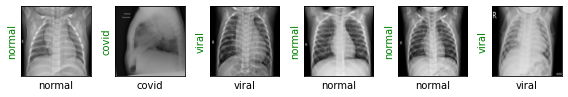

Performance condition satisfied...


In [33]:
training(epochs = 1)

### Task 9. Final Results

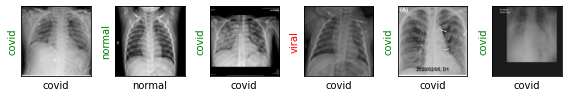

In [39]:
show_preds()

Project Finalized ... Congrats Holger Espinola ! ....... Enjoy Coursera!  